<h2> <u> Manual Dispersion Measurement </u> </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
c = 3e17 # nm/s

In [2]:
file_path = "/Users/jackmorse/Documents/University/Year 4/Semester 1/FYP/Physics-FYP/Data Files/Scan-1-poi-vs-stage-pos-LHS.xlsx"
data = pd.read_excel(file_path, skiprows=1)

In [3]:
poi = data["POI[nm]"].values
stage_pos = data["stage_pos[mm]"].values

$$\frac{d \lambda_0}{d \tau} = \frac{\pi c}{\lambda_0^2}\left(\frac{d^2 \Delta \varphi}{d \lambda^2}\right)^{-1}$$

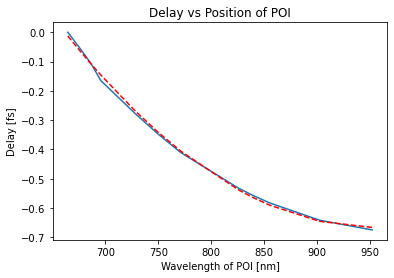

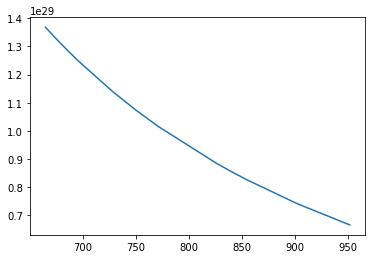

In [4]:
delay = (stage_pos - stage_pos[0])*1e-3 / 3e8
plt.plot(poi, delay*1e12)
fit_coeffs = np.polyfit(poi, delay, 2)
fit = np.polyval(fit_coeffs, poi)
plt.plot(poi, fit*1e12, linestyle = '--', color='r')
plt.ylabel("Delay [fs]")
plt.xlabel("Wavelength of POI [nm]")
plt.title("Delay vs Position of POI")
plt.show()

deriv_coeffs = np.polyder(fit_coeffs)
dLambda_0_dDelay = deriv_coeffs[0]
dispersion = (np.pi * c) / (poi**2 * dLambda_0_dDelay)
plt.plot(poi, dispersion)
